In [638]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [639]:
# Loading Data

data=pd.read_csv(r"C:\Users\Shashank Sundi\Desktop\I neuron\assignments\THYROID PREDICTION\hypothyroid.csv")
pd.options.display.max_columns = None
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


In [640]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

# Feature Column Description

age - Age of the person

sex - Male or Female

on_thyroxine - true or false

on_antithyroid_medication - true or false

sick - true or false

pregnant - true or false

thyroid_surgery - true or false

I131_treatment - true or false

query_hypothyroid - true or false

query_hyperthyroid -true or false

lithium - true or false

goitre - true or false

tumor - true or false

hypopituitary- true or false

psych - true or false

TSH_measured - true or false

TSH - thyroid stimulating hormone floating value

T3_measured - true or false

T3 - triiodothyronine value

TT4_measured- true or false

TT4 - Thyroxine value

T4U_measured- true or false

T4U - numerical value

FTI_measured- true or false

FTI -Free Thyroxine Index

TBG_measured- true or false

TBG -Thyroid-Binding Globulin  value

referral_source - different sources of referals

Class - different types of thyroid

In [641]:
data.shape

(3772, 30)

In [642]:
# validating data types
# although all columns are marked as object type , it is observable that 
# there are other data types as well
data.dtypes

age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
                              ...  
FTI                          object
TBG_measured                 object
TBG                          object
referral_source              object
Class                        object
Length: 30, dtype: object

In [643]:
#check for Null Values
data.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
                            ..
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
Length: 30, dtype: int64

In [644]:
#we can clearly observe that data contains invalid data values like ?
#hence we don't observe any nul values , since the nan values have been observed by "?"

#checking count of invalid data type ? , and replacing it with nan
pd.options.display.max_rows=None
bad_col=[]
for i in data.columns:
        a=data[i][data[i]=='?'].count()
        if a!=0:
                bad_col.append(i)
                print(a,"\t",i)
bad_col

1 	 age
150 	 sex
369 	 TSH
769 	 T3
231 	 TT4
387 	 T4U
385 	 FTI
3772 	 TBG


['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

In [645]:
# replacing all ? with nan
for i in bad_col:
    inval=data[i][data[i] =='?'].index
    data[i].loc[inval]=np.nan

In [646]:
data.isnull().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

In [647]:
#from above observations , we see that 'TBG' column is completely 
# full of invalid ? values , hence we remove that column

pd.options.display.max_rows=20
data.drop(['TBG'],axis=1,inplace=True)

In [648]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,NaN,f,NaN,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109,t,0.91,t,120,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,NaN,f,NaN,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,other,negative
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,other,negative
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,SVI,negative


In [649]:
# we can also observe that all the columns of the format x_measured 
# are just an indication of , whether the column x is measured or not
# and hence , it tells if value in it is nan or not

# So, there is no point in keeping those columns , so we drop them

data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1,inplace=True)

In [650]:
# from observations 
# numeric cols - age,TSH,T3,TT4,T4U,FTI,TBG

for i in [ 'age','TSH','T3','TT4','T4U','FTI']:
    data[i]=pd.to_numeric(data[i])

In [651]:
num_index=data.dtypes[data.dtypes=="float64"].index
data[num_index].describe()

,age,TSH,T3,TT4,T4U,FTI
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


In [652]:
categ_index=data.dtypes[data.dtypes=='object'].index
data[categ_index].describe()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,referral_source,Class
count,3622,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,5,4
top,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,other,negative
freq,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,2201,3481


In [653]:
# The fact that data is missing , for only some measurements indicates
# that there is some important information it might denote

# Hence , we capture the importance of nan values in a separate column
# and impute the nan values in original col using KNN imputer

from sklearn.impute import KNNImputer
imputer=KNNImputer(missing_values=np.nan)


for col in bad_col:
    if col=='TBG':
        continue
    if col not in ['sex','age']:
        data[col+"_nan"]=np.where(data[col].isnull(),1,0)
    if data[col].dtype=='float64':
        data[col]=imputer.fit_transform(data[[col]])
    else :
        data[col].fillna(data[col].mode()[0],inplace=True)

  

In [654]:
data.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
                            ..
TSH_nan                      0
T3_nan                       0
TT4_nan                      0
T4U_nan                      0
FTI_nan                      0
Length: 28, dtype: int64

In [655]:
data.dtypes

age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
                              ...   
TSH_nan                        int32
T3_nan                         int32
TT4_nan                        int32
T4U_nan                        int32
FTI_nan                        int32
Length: 28, dtype: object

In [656]:
# Rearranging Data

data=data[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH','TSH_nan', 'T3',  'T3_nan','TT4','TT4_nan',
        'T4U','T4U_nan','FTI', 'FTI_nan', 'referral_source','Class']]

In [657]:
categ_index

Index(['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'referral_source',
       'Class'],
      dtype='object')

In [658]:
for i in categ_index:
    print(i,"\n",data[i].value_counts())

sex 
 F    2630
M    1142
Name: sex, dtype: int64
on_thyroxine 
 f    3308
t     464
Name: on_thyroxine, dtype: int64
query_on_thyroxine 
 f    3722
t      50
Name: query_on_thyroxine, dtype: int64
on_antithyroid_medication 
 f    3729
t      43
Name: on_antithyroid_medication, dtype: int64
sick 
 f    3625
t     147
Name: sick, dtype: int64
pregnant 
 f    3719
t      53
Name: pregnant, dtype: int64
thyroid_surgery 
 f    3719
t      53
Name: thyroid_surgery, dtype: int64
I131_treatment 
 f    3713
t      59
Name: I131_treatment, dtype: int64
query_hypothyroid 
 f    3538
t     234
Name: query_hypothyroid, dtype: int64
query_hyperthyroid 
 f    3535
t     237
Name: query_hyperthyroid, dtype: int64
lithium 
 f    3754
t      18
Name: lithium, dtype: int64
goitre 
 f    3738
t      34
Name: goitre, dtype: int64
tumor 
 f    3676
t      96
Name: tumor, dtype: int64
hypopituitary 
 f    3771
t       1
Name: hypopituitary, dtype: int64
psych 
 f    3588
t     184
Name: psych, dtype: int64


In [659]:
# ENCODING CATEGORIAL COLUMNS

# Most columns have only two categories - True and False
# So, we use mapping instead of one hot encoding every single column

# We'll do Frequency encoding of "Referral Source"

t_f_map={'t':0,'f':1}  #true false mapper
sex_map={'M':1,'F':0}
ref_map=data.referral_source.value_counts().to_dict()

for col in categ_index:
    if col =="Class":
        continue
    elif col =="sex":
        data[col]=data[col].map(sex_map)
    elif col=="referral_source":
        data[col]=data[col].map(ref_map)
    else:
        data[col]=data[col].map(t_f_map)


In [660]:
data.Class.value_counts()

negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

In [661]:
# LABEL ENCODING THE TARGET COLUMN
# target col- Class has 4 distint categories

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data.Class=label_encoder.fit_transform(data.Class)


In [662]:
label_encoder.classes_

# encoded labels to --- negative : 1 ; compensated_hypothyroid : 0;
# primary_hypothyroid : 2 ; secondary_hypothyroid : 3

array(['compensated_hypothyroid', 'negative', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

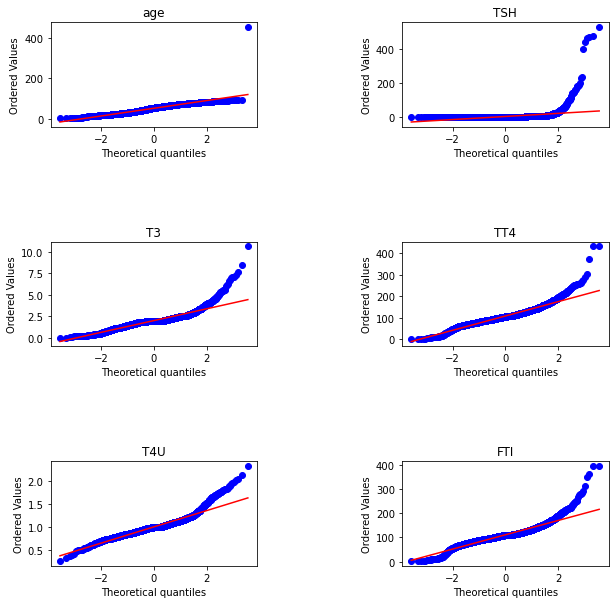

In [663]:
# visualizing the distributtion of numerical features

from scipy import stats

fig,ax=plt.subplots(3,2,figsize=(10,10))
plt.subplots_adjust( 
                    wspace=0.7, 
                    hspace=1.1)

a,b=0,0
for col in num_index:
    stats.probplot(data[col],plot=ax[a,b])
    ax[a,b].set_title(col)
    b+=1
    if b==2:
        b=0
        a+=1
    
    # age column is normally distributed
    # All other columns are left skewed , and hence will have utliers in the right tail of the distribution


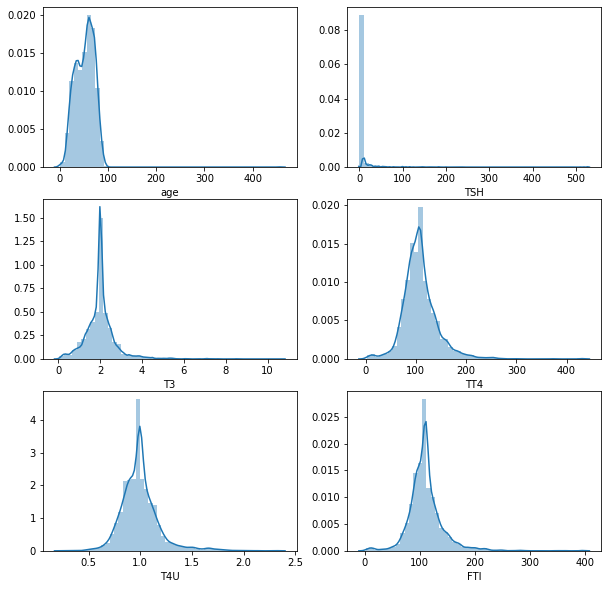

In [664]:
fig,ax=plt.subplots(3,2,figsize=(10,10))

a,b=0,0
for col in num_index:
    sns.distplot(data[col],ax=ax[a,b])
    b+=1
    if b==2:
        b=0
        a+=1

In [665]:
data[num_index].describe()

,age,TSH,T3,TT4,T4U,FTI
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649
std,20.082295,23.290853,0.738262,34.496511,0.185156,31.355087
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.000000,0.600000,1.700000,89.000000,0.890000,94.000000
50%,54.000000,1.600000,2.013500,106.000000,0.995000,110.000000
75%,67.000000,3.800000,2.200000,123.000000,1.070000,121.250000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


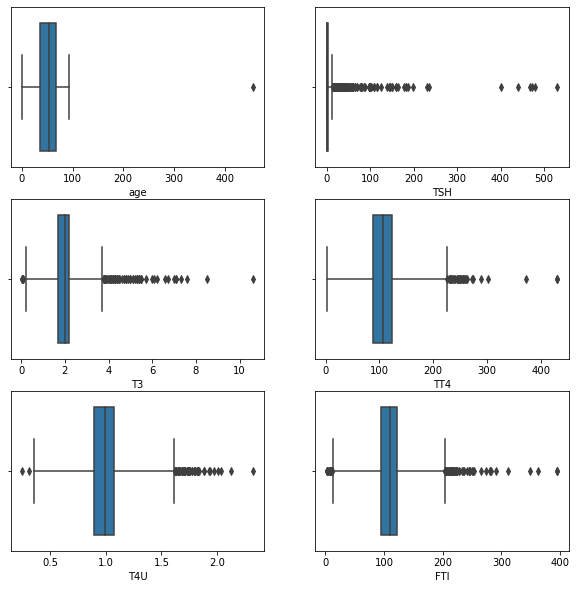

In [666]:
# Checking for outliers in numerical features

fig,ax=plt.subplots(3,2,figsize=(10,10))

a,b=0,0
for col in num_index:
    sns.boxplot(data[col],ax=ax[a,b],whis=3)
    b+=1
    if b==2:
        b=0
        a+=1

In [667]:
# Finding the no. of outliers in each col and impute them with the mean value

for col in num_index:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    a,b=0,0
    for idx,i in enumerate(data[col]):
        if (i<q1-3*iqr) or (i>q3+3*iqr):
            b+=1
            data[col].loc[idx]=data[col].mean()
    print(f"{col}")
    print(f"No. of Outliers : {b}")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


age
No. of Outliers : 1
TSH
No. of Outliers : 167
T3
No. of Outliers : 105
TT4
No. of Outliers : 32
T4U
No. of Outliers : 60
FTI
No. of Outliers : 76


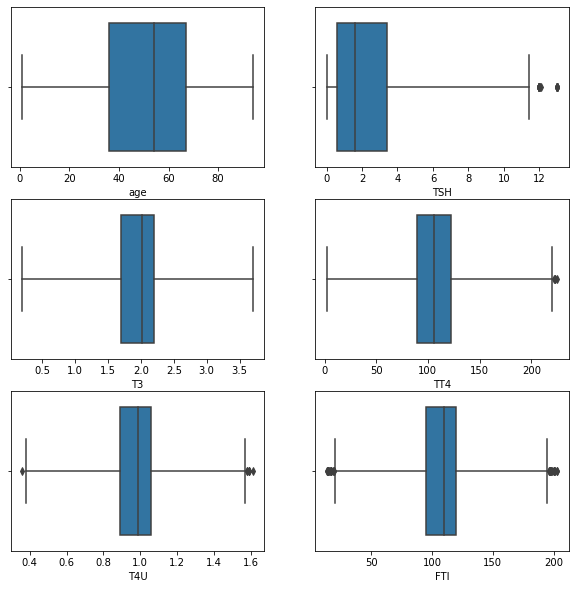

In [668]:
# Checking for outliers after they have been imputed with mean values

fig,ax=plt.subplots(3,2,figsize=(10,10))

a,b=0,0
for col in num_index:
    sns.boxplot(data[col],ax=ax[a,b],whis=3)
    b+=1
    if b==2:
        b=0
        a+=1

1    3481
0     194
2      95
3       2
Name: Class, dtype: int64


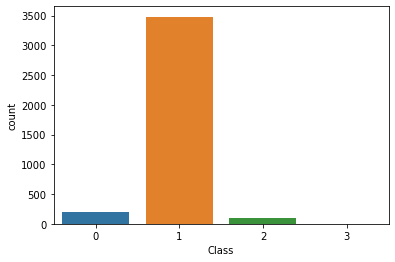

In [669]:
# we can clearly see that some of the classes are highly under-represented
# The dataset is highly imbalanced

sns.countplot(data.Class)
print(data.Class.value_counts())

In [670]:
# Oversampling using SMOTE

X=data.drop(['Class'],axis=1)
y=data.Class

from imblearn.over_sampling import ADASYN,SMOTE,RandomOverSampler,KMeansSMOTE

smote=SMOTE(k_neighbors=1)
X,y=smote.fit_resample(X,y)

3    3481
2    3481
1    3481
0    3481
Name: Class, dtype: int64


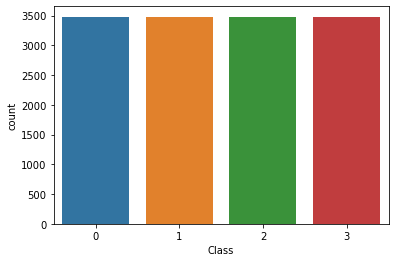

In [671]:
sns.countplot(y)
print(y.value_counts())

In [672]:
# Checking if any columns don't have much variance and thereby 
# do not have much predictive power

"""from sklearn.feature_selection import VarianceThreshold

var_thresh=VarianceThreshold(threshold=0.01)
var_thresh.fit(X)

print(f"{len(X.columns)-len(X.columns[var_thresh.get_support()])} columns have less than 0.01 variance , so we drop them")

[column for column in X.columns if column not in X.columns[var_thresh.get_support()]]"""

# we didn't remove using variance threshold as it might remove some imortant info regarding the dataset
# requires domain knowledge

'from sklearn.feature_selection import VarianceThreshold\n\nvar_thresh=VarianceThreshold(threshold=0.01)\nvar_thresh.fit(X)\n\nprint(f"{len(X.columns)-len(X.columns[var_thresh.get_support()])} columns have less than 0.01 variance , so we drop them")\n\n[column for column in X.columns if column not in X.columns[var_thresh.get_support()]]'

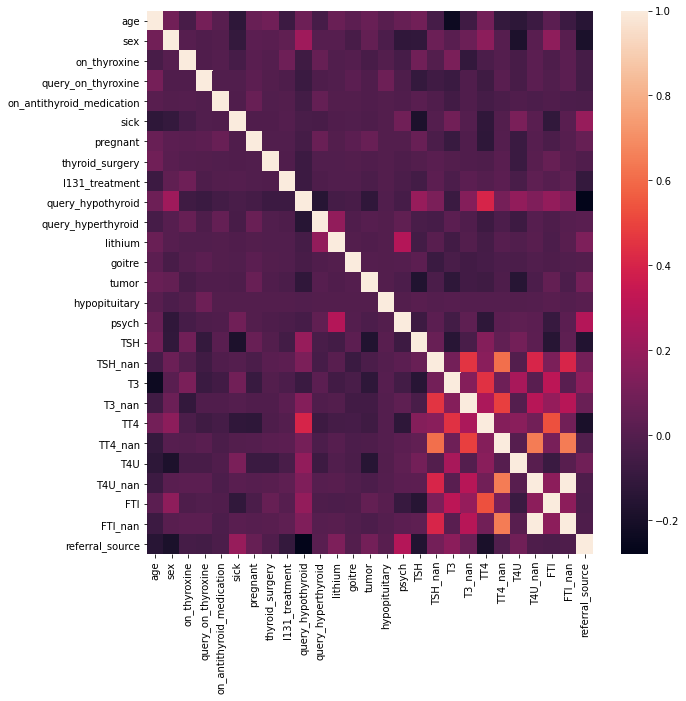

In [673]:
# Visualizing the correlation matrix

fig=plt.figure(figsize=(10,10))
sns.heatmap(X.corr())

In [674]:
corr_matrix=X.corr()

In [675]:
# Finding highly correlated columns and removing them

highly_correlated=set()

for i in X.columns:
    for j in X.columns:
        if j==i:
            continue
        else:
            if abs(corr_matrix.loc[i,j])>0.85:
                print(f"\n{i}---{j}")
                print(corr_matrix.loc[i,j])
                if (i not in highly_correlated) and (j not in highly_correlated):
                     highly_correlated.add(i)





T4U_nan---FTI_nan
0.9983945430895294

FTI_nan---T4U_nan
0.9983945430895294


In [676]:
list(highly_correlated)

['T4U_nan']

In [677]:
X=X.drop(['T4U_nan'],axis=1)

In [678]:
data=pd.concat([X,y],axis=1)

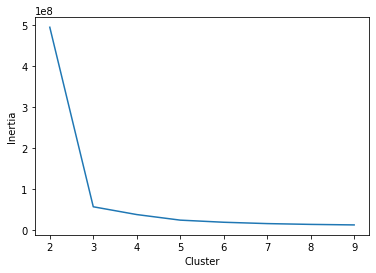

In [679]:
# Elbow curve ,to determine optimal no. of clusters

from sklearn.cluster import dbscan,KMeans

inertia=[]
for k in range(2,10):
    cluster=KMeans(n_clusters=k,n_init=10)
    cluster.fit(data)
    inertia.append(cluster.inertia_)

elbow=pd.DataFrame(data={'Cluster':range(2,10),'Inertia':inertia})
sns.lineplot(x=elbow.Cluster,y=elbow.Inertia)

In [680]:
#Clustering data to fit separate models on the different clusters , so that model generalises well
#From above elbow curve , optimal no. of clusters is 3 or 4 ( as expected )

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(data.drop(['Class'],axis=1)) 
data['Cluster']=kmeans.predict(data.drop(['Class'],axis=1))
data.drop(['Class'],axis=1).head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,TSH_nan,T3,T3_nan,TT4,TT4_nan,T4U,FTI,FTI_nan,referral_source,Cluster
0,41.0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.30,0,2.5000,0,125.0,0,1.140,109.000000,0,386,2
1,23.0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4.10,0,2.0000,0,102.0,0,0.995,110.469649,1,2201,1
2,46.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.98,0,2.0135,1,109.0,0,0.910,120.000000,0,2201,1
3,70.0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0.16,0,1.9000,0,175.0,0,0.995,110.469649,1,2201,1
4,70.0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.72,0,1.2000,0,61.0,0,0.870,70.000000,0,1034,0


In [681]:
# cluster labels
set(kmeans.labels_)

{0, 1, 2, 3}

In [682]:
data.Cluster.value_counts()

1    9537
0    3423
2     591
3     373
Name: Cluster, dtype: int64

In [683]:
data_c1=data[data.Cluster==0].drop(['Cluster'],axis=1).copy(deep=True)
data_c2=data[data.Cluster==1].drop(['Cluster'],axis=1).copy(deep=True)
data_c3=data[data.Cluster==2].drop(['Cluster'],axis=1).copy(deep=True)
data_c4=data[data.Cluster==3].drop(['Cluster'],axis=1).copy(deep=True)

In [684]:
#Classification Models to try :
""" Logistic Regression , KNN , SVM , Naive Bayes Classifier , Dtree Classifier, XGB classifier , rand-forest classifier
Stacking """

' Logistic Regression , KNN , SVM , Naive Bayes Classifier , Dtree Classifier, XGB classifier , rand-forest classifier\nStacking '

In [685]:
# Evaluation metric for models - Recall ( Since , thyroid is a life
# threatening disease , it is important to identify if a person is 
# having it ; hencewe choose Recall / sensitivity a s our model)

In [686]:
#Trying Logistic Regression

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,accuracy_score,roc_auc_score

scores_logreg=[]
accuracy_logreg=[]

# Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

for i in [data_c1,data_c2,data_c3,data_c4]:
        X=i.drop(['Class'],axis=1)
        X=scaler.fit_transform(X)
        y=i.Class
        X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=2)

        logreg=LogisticRegression(max_iter=1000,solver='newton-cg')
        logreg.fit(X_train,y_train)
        pred=logreg.predict(X_test)
        pred_proba=logreg.predict_proba(X_test)

        #collecting accuracy
        acc=accuracy_score(y_test,pred)
        accuracy_logreg.append(acc)

        #collecting recall
        recall=recall_score(y_test,pred,average='macro')
        scores_logreg.append(recall)

            
print(f"Cluster 1--Recall:{scores_logreg[0]}  Accuracy :{accuracy_logreg[0]} ")
print(f"Cluster 2--Recall:{scores_logreg[1]}  Accuracy :{accuracy_logreg[1]} ")
print(f"Cluster 3--Recall:{scores_logreg[2]}  Accuracy :{accuracy_logreg[2]} ")
print(f"Cluster 4--Recall:{scores_logreg[3]}  Accuracy :{accuracy_logreg[3]} ")

Cluster 1--Recall:0.9580325097069678  Accuracy :0.9620253164556962 
Cluster 2--Recall:0.9821947792348297  Accuracy :0.9842767295597484 
Cluster 3--Recall:0.9943977591036415  Accuracy :0.9887640449438202 
Cluster 4--Recall:0.9912280701754387  Accuracy :0.9910714285714286 


In [687]:
# Trying KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

scores_knn=[]
accuracy_knn=[]

scaler=StandardScaler()

for i in [data_c1,data_c2,data_c3,data_c4]:
        X=i.drop(['Class'],axis=1)
        X=scaler.fit_transform(X)
        y=i.Class
        X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=2)
        
        knn=KNeighborsClassifier(n_neighbors=10,weights='distance',metric='euclidean')
        knn.fit(X_train,y_train)
        pred=knn.predict(X_test)

        #collecting accuracy
        acc=accuracy_score(y_test,pred)
        accuracy_knn.append(acc)

        #collecting recall
        recall=recall_score(y_test,pred,average='macro')
        scores_knn.append(recall)
            
print(f"Cluster 1---Recall : {scores_knn[0]}  Accuracy : {accuracy_knn[0]}")
print(f"Cluster 2---Recall : {scores_knn[1]}  Accuracy : {accuracy_knn[1]}")
print(f"Cluster 3---Recall : {scores_knn[2]}  Accuracy : {accuracy_knn[2]}")
print(f"Cluster 4---Recall : {scores_knn[3]}  Accuracy : {accuracy_knn[3]}")

Cluster 1---Recall : 0.9714625207236934  Accuracy : 0.9776046738072055
Cluster 2---Recall : 0.9749190707894811  Accuracy : 0.9779874213836478
Cluster 3---Recall : 0.988795518207283  Accuracy : 0.9775280898876404
Cluster 4---Recall : 0.9912280701754387  Accuracy : 0.9910714285714286


In [688]:
# Trying SVM Classifier

from sklearn.svm import SVC,LinearSVC


scores_svc=[]
accuracy_svc=[]

scaler=StandardScaler()

for i in [data_c1,data_c2,data_c3,data_c4]:
        X=i.drop(['Class'],axis=1)
        X=scaler.fit_transform(X)
        y=i.Class
        X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=2)
        
        svc=SVC(C=1, kernel="poly", degree=4)

        svc.fit(X_train,y_train)
        pred=svc.predict(X_test)

        #collecting accuracy
        acc=accuracy_score(y_test,pred)
        accuracy_svc.append(acc)

        #collecting recall
        recall=recall_score(y_test,pred,average='macro')
        scores_svc.append(recall)
            
print(f"Cluster 1---Recall : {scores_svc[0]}  Accuracy : {accuracy_svc[0]}")
print(f"Cluster 2---Recall : {scores_svc[1]}  Accuracy : {accuracy_svc[1]}")
print(f"Cluster 3---Recall : {scores_svc[2]}  Accuracy : {accuracy_svc[2]}")
print(f"Cluster 4---Recall : {scores_svc[3]}  Accuracy : {accuracy_svc[3]}")



Cluster 1---Recall : 0.863833520283205  Accuracy : 0.8763388510223953
Cluster 2---Recall : 0.8069044250872075  Accuracy : 0.8350803633822502
Cluster 3---Recall : 0.8205128205128206  Accuracy : 0.8426966292134831
Cluster 4---Recall : 0.7995451591942819  Accuracy : 0.8214285714285714


In [689]:
# Trying Naive Bayes

from sklearn.naive_bayes import MultinomialNB

scores_nb=[]
accuracy_nb=[]

for i in [data_c1,data_c2,data_c3,data_c4]:
        X=i.drop(['Class'],axis=1)
        y=i.Class
        X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=2)
        
        nb=MultinomialNB()
        nb.fit(X_train,y_train)
        pred=nb.predict(X_test)

        #collecting accuracy
        acc=accuracy_score(y_test,pred)
        accuracy_nb.append(acc)

        #collecting recall
        recall=recall_score(y_test,pred,average='macro')
        scores_nb.append(recall)
            
print(f"Cluster 1---Recall : {scores_nb[0]}  Accuracy : {accuracy_nb[0]}")
print(f"Cluster 2---Recall : {scores_nb[1]}  Accuracy : {accuracy_nb[1]}")
print(f"Cluster 3---Recall : {scores_nb[2]}  Accuracy : {accuracy_nb[2]}")
print(f"Cluster 4---Recall : {scores_nb[3]}  Accuracy : {accuracy_nb[3]}")

Cluster 1---Recall : 0.8809892700044925  Accuracy : 0.8851022395326192
Cluster 2---Recall : 0.7825055038371641  Accuracy : 0.7858141160027953
Cluster 3---Recall : 0.9663865546218487  Accuracy : 0.9325842696629213
Cluster 4---Recall : 0.910227696901829  Accuracy : 0.9017857142857143


In [690]:
#Trying Random Forest

from sklearn.ensemble import RandomForestClassifier

scores_rf=[]
accuracy_rf=[]

for i in [data_c1,data_c2,data_c3,data_c4]:
        X=i.drop(['Class'],axis=1)
        y=i.Class
        X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=2)
        
        rf=RandomForestClassifier()
        rf.fit(X_train,y_train)
        pred=rf.predict(X_test)

        #collecting accuracy
        acc=accuracy_score(y_test,pred)
        accuracy_rf.append(acc)

        #collecting recall
        recall=recall_score(y_test,pred,average='macro')
        scores_rf.append(recall)
            
print(f"Cluster 1---Recall : {scores_rf[0]}  Accuracy : {accuracy_rf[0]}")
print(f"Cluster 2---Recall : {scores_rf[1]}  Accuracy : {accuracy_rf[1]}")
print(f"Cluster 3---Recall : {scores_rf[2]}  Accuracy : {accuracy_rf[2]}")
print(f"Cluster 4---Recall : {scores_rf[3]}  Accuracy : {accuracy_rf[3]}")

Cluster 1---Recall : 0.9937578027465669  Accuracy : 0.9951314508276533
Cluster 2---Recall : 0.9921752790248459  Accuracy : 0.9930118798043326
Cluster 3---Recall : 0.9915966386554622  Accuracy : 0.9831460674157303
Cluster 4---Recall : 0.9912280701754387  Accuracy : 0.9910714285714286


In [691]:
#Trying XGB Classsifier

from xgboost import XGBClassifier

scores_xgb=[]
accuracy_xgb=[]

for i in [data_c1,data_c2,data_c3,data_c4]:
        X=i.drop(['Class'],axis=1)
        y=i.Class
        X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=2)
        
        xgb=XGBClassifier(use_label_encoder=False ,eval_metric='error')
        xgb.fit(X_train,y_train)
        pred=xgb.predict(X_test)

        #collecting accuracy
        acc=accuracy_score(y_test,pred)
        accuracy_xgb.append(acc)

        #collecting recall
        recall=recall_score(y_test,pred,average='macro')
        scores_xgb.append(recall)
            
print(f"Cluster 1---Recall : {scores_xgb[0]}  Accuracy : {accuracy_xgb[0]}")
print(f"Cluster 2---Recall : {scores_xgb[1]}  Accuracy : {accuracy_xgb[1]}")
print(f"Cluster 3---Recall : {scores_xgb[2]}  Accuracy : {accuracy_xgb[2]}")
print(f"Cluster 4---Recall : {scores_xgb[3]}  Accuracy : {accuracy_xgb[3]}")


Cluster 1---Recall : 0.9925093632958801  Accuracy : 0.994157740993184
Cluster 2---Recall : 0.9928995705794975  Accuracy : 0.9937106918238994
Cluster 3---Recall : 0.9915966386554622  Accuracy : 0.9831460674157303
Cluster 4---Recall : 0.9824561403508771  Accuracy : 0.9821428571428571


In [692]:
# Comparing Recall Values

recall_vals=pd.DataFrame(data=[scores_logreg,scores_knn,scores_svc,
                        scores_nb,scores_rf,scores_xgb],
                        index=['Logreg_recall','knn_recall','svc_recall',
                        'nb_recall','rf_recall','xgb_recall'],
                        columns=['Cluster 1','Cluster 2','Cluster 3','Cluster 4'])

recall_vals

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Logreg_recall,0.958033,0.982195,0.994398,0.991228
knn_recall,0.971463,0.974919,0.988796,0.991228
svc_recall,0.863834,0.806904,0.820513,0.799545
nb_recall,0.880989,0.782506,0.966387,0.910228
rf_recall,0.993758,0.992175,0.991597,0.991228
xgb_recall,0.992509,0.992900,0.991597,0.982456


In [693]:
# Comparing Accuracy Values

accuracy_vals=pd.DataFrame(data=[accuracy_logreg,accuracy_knn,accuracy_svc,
                        accuracy_nb,accuracy_rf,accuracy_xgb],
                        index=['Logreg_accuracy','knn_accuracy','svc_accuracy',
                        'nb_accuracy','rf_accuracy','xgb_accuracy'],
                        columns=['Cluster 1','Cluster 2','Cluster 3','Cluster 4'])

accuracy_vals

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Logreg_accuracy,0.962025,0.984277,0.988764,0.991071
knn_accuracy,0.977605,0.977987,0.977528,0.991071
svc_accuracy,0.876339,0.835080,0.842697,0.821429
nb_accuracy,0.885102,0.785814,0.932584,0.901786
rf_accuracy,0.995131,0.993012,0.983146,0.991071
xgb_accuracy,0.994158,0.993711,0.983146,0.982143


In [694]:
for i in recall_vals.columns:
    print(f"Best Model for {i} : {recall_vals[i].idxmax()} ")

Best Model for Cluster 1 : rf_recall 
Best Model for Cluster 2 : xgb_recall 
Best Model for Cluster 3 : Logreg_recall 
Best Model for Cluster 4 : Logreg_recall 


In [695]:
for i in accuracy_vals.columns:
    print(f"Best Model for {i} : {accuracy_vals[i].idxmax()} ")

Best Model for Cluster 1 : rf_accuracy 
Best Model for Cluster 2 : xgb_accuracy 
Best Model for Cluster 3 : Logreg_accuracy 
Best Model for Cluster 4 : Logreg_accuracy 


In [696]:
# From above observations, we can conclude that 
# random forest is best model for data belonging to Cluster 1
# XGB is best model for data belonging to Cluster 2 
# Logistic Regression is best model for data belonging to Cluster 3 and 4

In [697]:
# Model for Cluster 2

X=data_c2.drop(['Class'],axis=1)
y=data_c2.Class
X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=2)
xgb_c2=XGBClassifier(use_label_encoder=False ,eval_metric='error')
xgb_c2.fit(X_train,y_train)

import pickle
filename_c2="xgb_c2.pickle"
pickle.dump(xgb_c2,open(filename_c2,'wb'))

In [698]:
# Model for Cluster 1

X=data_c1.drop(['Class'],axis=1)
y=data_c1.Class
X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=2)
rf_c1=RandomForestClassifier()
rf_c1.fit(X_train,y_train)

import pickle
filename_c1="rf_c1.pickle"
pickle.dump(rf_c1,open(filename_c1,'wb'))

In [699]:
# Model for Cluster 3

scaler_c3=StandardScaler()

X=data_c3.drop(['Class'],axis=1)
X=scaler_c3.fit_transform(X)
y=data_c3.Class
X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=2)
logreg_c3=LogisticRegression(max_iter=1000,solver='newton-cg')
logreg_c3.fit(X_train,y_train)

import pickle
filename_c3="logreg_c3.pickle"
pickle.dump(logreg_c3,open(filename_c3,'wb'))

filename_scaler="scaler_c3.pickle"
pickle.dump(scaler_c3,open(filename_scaler,'wb'))

In [700]:
# Model for Cluster 4

scaler_c4=StandardScaler()

X=data_c4.drop(['Class'],axis=1)
X=scaler_c4.fit_transform(X)
y=data_c4.Class
X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=2)
logreg_c4=LogisticRegression(max_iter=1000,solver='newton-cg')
logreg_c4.fit(X_train,y_train)

import pickle
filename_c4="logreg_c4.pickle"
pickle.dump(logreg_c4,open(filename_c4,'wb'))

filename_scaler="scaler_c4.pickle"
pickle.dump(scaler_c4,open(filename_scaler,'wb'))

In [701]:
# Getting the cluster centroids of the 4 clusters

c1_center=kmeans.cluster_centers_[0]
c2_center=kmeans.cluster_centers_[1]
c3_center=kmeans.cluster_centers_[2]
c4_center=kmeans.cluster_centers_[3]

In [702]:
test_data=np.array(data.drop(['Class','Cluster'],axis=1).loc[342])

In [703]:
c1_center

array([5.99557244e+01, 2.07128250e-01, 9.31346772e-01, 9.96202162e-01,
       1.00000000e+00, 9.18492550e-01, 1.00000000e+00, 9.88022203e-01,
       1.00000000e+00, 8.14782355e-01, 9.40403155e-01, 9.99415717e-01,
       9.97078586e-01, 9.52380952e-01, 9.99707859e-01, 9.84516506e-01,
       4.89252061e+00, 1.75284838e-03, 1.21875028e+00, 1.40227870e-02,
       7.02022438e+01, 1.16856559e-03, 9.41035565e-01, 8.44538779e+01,
       4.14840783e-02, 1.03400000e+03])

In [704]:
test_data

array([6.00000000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       5.08676609e+00, 1.00000000e+00, 2.20000000e+00, 0.00000000e+00,
       1.08319345e+02, 1.00000000e+00, 9.94999705e-01, 1.10469649e+02,
       1.00000000e+00, 2.20100000e+03])

In [705]:
np.linalg.norm(-c1_center+test_data)

1167.913844028297

In [706]:
# function to find closest cluster center , from test point

def find_cluster(test_point):
    distances=[]
    for center in kmeans.cluster_centers_:
        dist=np.linalg.norm(center-test_point)
        distances.append(dist)
        
    dist_frame=pd.DataFrame(data=distances,columns=['Distances'])
    cluster=dist_frame.Distances.idxmin()
    print(f"The point belongs to cluster {cluster}")
    
    return cluster

In [707]:
find_cluster(test_data)

The point belongs to cluster 1


1

In [708]:
# Get model for particular cluster

def find_model(cluster):
    models=[rf_c1,xgb_c2,logreg_c3,logreg_c4]
    if cluster==0:
        return rf_c1
    if cluster==1:
        return xgb_c2
    if cluster==2:
        return logreg_c3
    if cluster==3:
        return logreg_c4

In [714]:
model=find_model(1)
model.predict(pd.DataFrame(test_data).T)[0]

1

In [716]:
data.loc[342]

age                            60.000000
sex                             0.000000
on_thyroxine                    1.000000
query_on_thyroxine              1.000000
on_antithyroid_medication       1.000000
                                ...     
FTI                           110.469649
FTI_nan                         1.000000
referral_source              2201.000000
Class                           1.000000
Cluster                         1.000000
Name: 342, Length: 28, dtype: float64